In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import glob
import os
import io 
from ast import literal_eval

### Get all the files with the suffix '_dis'

In [7]:
globbed_files = glob.glob("Data/*/foragers100/*/*_dis.txt")


In [8]:
globbed_files

['../Data/Central_place/pop100/beta1.5/radius1/29_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/0_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/11_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/48_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/39_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/32_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/23_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/13_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/6_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/47_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/28_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/5_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/25_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/2_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/44_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radius1/22_dis.txt',
 '../Data/Central_place/pop100/beta1.5/radiu

#### create a dataframe from these files
#### dismoved represents the distance of all the logistical/foraging moves made by a forager across the simulations
#### homedis represents the distance of all the residential moves made by a forager across the simulations
#### logistic_moves represents the number of logistical/foraging moves made by a forager across the simulations
#### residential_moves represents the number of residential moves made by a forager across the simulations

In [9]:
df =[]
generic = lambda x: ast.literal_eval(x)
conv = {'homdis': generic,
        'dismoved': generic,
        'food': generic}
for csv in globbed_files:
    frame = pd.read_csv(csv, sep=',', quotechar='"', engine='python', names=["beta", "id", "dismoved", "homedis", "food", "logistic_moves", "residential_moves"])
    frame.homedis = frame.homedis.apply(literal_eval)
    frame.dismoved = frame.dismoved.apply(literal_eval)
    frame.food = frame.food.apply(literal_eval)
    frame['radius'] = (float(csv.split('radius')[1].split('/')[0]))
    frame['population'] = 100
    frame['run'] = int(float(os.path.basename(csv).split('_')[0]))
    df.append(frame)
df = pd.concat(df, ignore_index=True)



In [10]:
df.head()

,beta,id,dismoved,homedis,food,logistic_moves,residential_moves,radius,population,run
0,1.5,0,[0.02092],[],[],1,0,1.0,100,29
1,1.5,1,[0.02273],[],[],1,0,1.0,100,29
2,1.5,2,[0.00708],[],[],1,0,1.0,100,29
3,1.5,3,[0.01671],[],[],1,0,1.0,100,29
4,1.5,4,[0.02199],[],[],1,0,1.0,100,29


### We can now plot the bottom plot from Figure 4 that shows the frequency of residential moves and logistic/foraging moves 

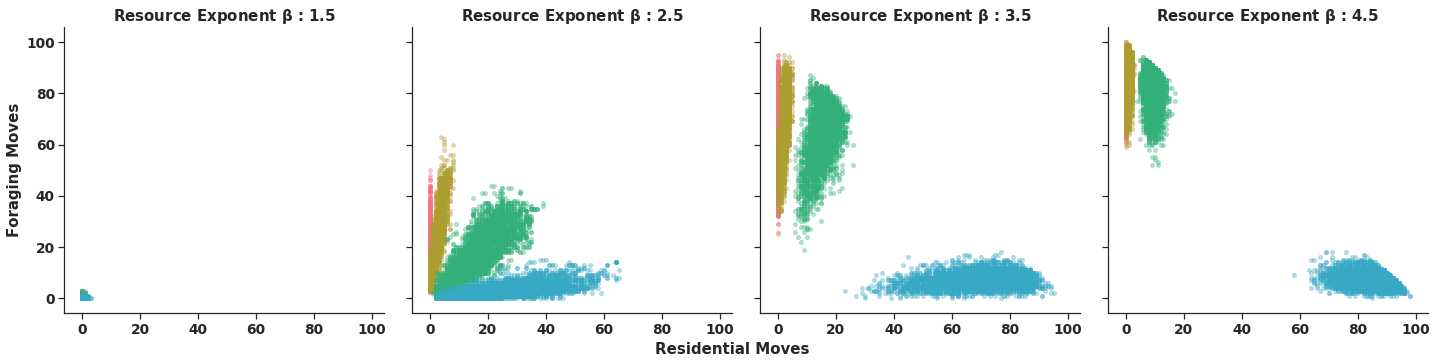

In [13]:
%matplotlib inline
sns.set(style="ticks", rc={"lines.linewidth": 1.7}, font_scale=1.25)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

hue_order = [1, 0.1, 0.01, 0.001, 'Baseline'] #[0.001, 0.01, 0.1, 1]
order = [0.001, 0.01, 0.1, 1]
g = sns.lmplot(data=df[df.radius > 0], x="residential_moves", y="logistic_moves", hue="radius", col='beta',  palette='husl', fit_reg=False,  scatter=True, scatter_kws={'s':15, 'alpha':0.35}, hue_order=hue_order, legend=False)


axes = g.axes.flatten()
axes[0].set_title(r"Resource Exponent $\mathbf{\beta}$ : 1.5", weight='bold')
axes[1].set_title(r"Resource Exponent $\mathbf{\beta}$ : 2.5", weight='bold')
axes[2].set_title(r"Resource Exponent $\mathbf{\beta}$ : 3.5", weight='bold')
axes[3].set_title(r"Resource Exponent $\mathbf{\beta}$ : 4.5", weight='bold')

axes[0].set_ylabel("Foraging Moves")
axes[1].set_xlabel("Residential Moves")
axes[0].set_xlabel("")
axes[2].set_xlabel("")
axes[3].set_xlabel("")

axes[1].xaxis.set_label_coords(1, -0.1)


# plt.savefig('./foraging_res_moves.svg', format='svg', dpi=500)
# plt.savefig('./foraging_res_moves.png', format='png', dpi=500)

plt.show()

### To plot the top part of Figure 4, we will need to calculate some more metrics

In [14]:
## Here we calculate the mean foraging/logistic and residential distance moved by a forager
df['mean_residential_distance'] = df.apply(lambda x: np.mean(x['homedis']), axis=1)
df['mean_logistic_distance'] = df.apply(lambda x: np.mean(x['dismoved']), axis=1)

In [18]:
### because when radius=1, the list of residential distances is empty, the mean shows NaN, we need to replace it with 0. 

df['mean_residential_distance'] = df.apply(lambda x:  0 if (x['radius'] == 1) else x['mean_residential_distance'], axis=1)


### Now we can get the Top part of Figure 4 which shows the mean distance moved logistically vs residentially 

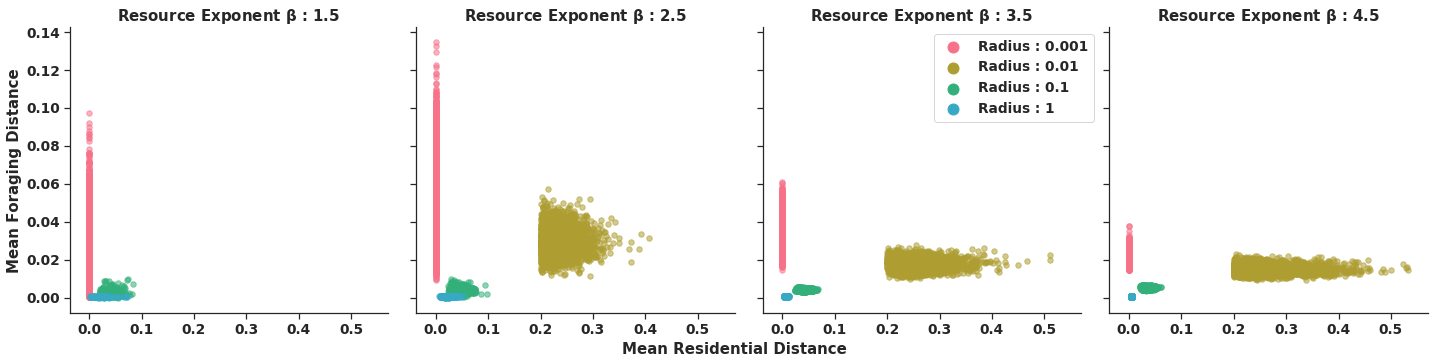

In [20]:
sns.set(style="ticks", rc={"lines.linewidth": 1.7}, font_scale=1.25)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# cmap = sns.cubehelix_palette(rot=-.5, as_cmap=True)  
hue_order = [1, 0.1, 0.01, 0.001, 'Baseline']
# cmap = sns.dark_palette("#2ecc71", as_cmap=True)
g = sns.lmplot(data=df[df.radius > 0], x="mean_residential_distance", y="mean_logistic_distance", hue="radius", col='beta',  palette='husl', fit_reg=False,  scatter=True, scatter_kws={'s':30, 'alpha':0.55}, hue_order=hue_order, legend=False)


# g = sns.catplot(data= df, x="beta", y="global", hue="radius", col='population',sharex=True, palette='YlGnBu_r',kind='point', dodge=True,linestyles=["-","-","-", "--"], hue_order=hue_order, ci=None, legend=False)
# plt.setp(ax.lines, alpha=.3)       #for the lines
axes = g.axes.flatten()
axes[0].set_title(r"Resource Exponent $\mathbf{\beta}$ : 1.5", weight='bold')
axes[1].set_title(r"Resource Exponent $\mathbf{\beta}$ : 2.5", weight='bold')
axes[2].set_title(r"Resource Exponent $\mathbf{\beta}$ : 3.5", weight='bold')
axes[3].set_title(r"Resource Exponent $\mathbf{\beta}$ : 4.5", weight='bold')

axes[0].set_ylabel("Mean Foraging Distance")
# for ax in axes:
axes[1].set_xlabel("Mean Residential Distance")
axes[0].set_xlabel("")
axes[2].set_xlabel("")
axes[3].set_xlabel("")

axes[1].xaxis.set_label_coords(1, -0.1)

L=plt.legend(frameon=True, loc='upper center', bbox_to_anchor=(-0.3,1), markerscale=2)
for lh in L.legendHandles: 
    lh.set_alpha(1)
L.get_texts()[3].set_text('Radius : 1 ')
L.get_texts()[2].set_text('Radius : 0.1 ')
L.get_texts()[1].set_text('Radius : 0.01 ')
L.get_texts()[0].set_text('Radius : 0.001')
# # g.set(yticks=np.arange(0.02,0.14,0.03))

